In [68]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [69]:
df = pd.read_csv("churn_modified.csv")

In [70]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Int'l Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [71]:
# Basic Information
df.isna().sum()

# Basic info
print(df.info())
print(df.describe())

# Target distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))  # percentages

df.nunique()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Int'l Mins      3333 non-null   float64
 17  Intl Calls      3333 non-null   i

0

In [72]:
# Standardize column names: replace 'Intl' with "Int'l"
df.rename(columns=lambda x: x.replace('Intl', "Int'l"), inplace=True)

# Verify the changes
print(df.columns)


Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Int'l Mins', 'Int'l Calls', 'Int'l Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop target from feature separation
target = 'Churn'
features = df.drop(columns=[target])

# Separate column types
num_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = features.select_dtypes(include=['object', 'bool']).columns.tolist()

print(" Numerical Columns:", num_cols)
print(" Categorical Columns:", cat_cols)


 Numerical Columns: ['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', "Int'l Mins", "Int'l Calls", "Int'l Charge", 'CustServ Calls']
 Categorical Columns: ['State', 'Phone', "Int'l Plan", 'VMail Plan']


       Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.57

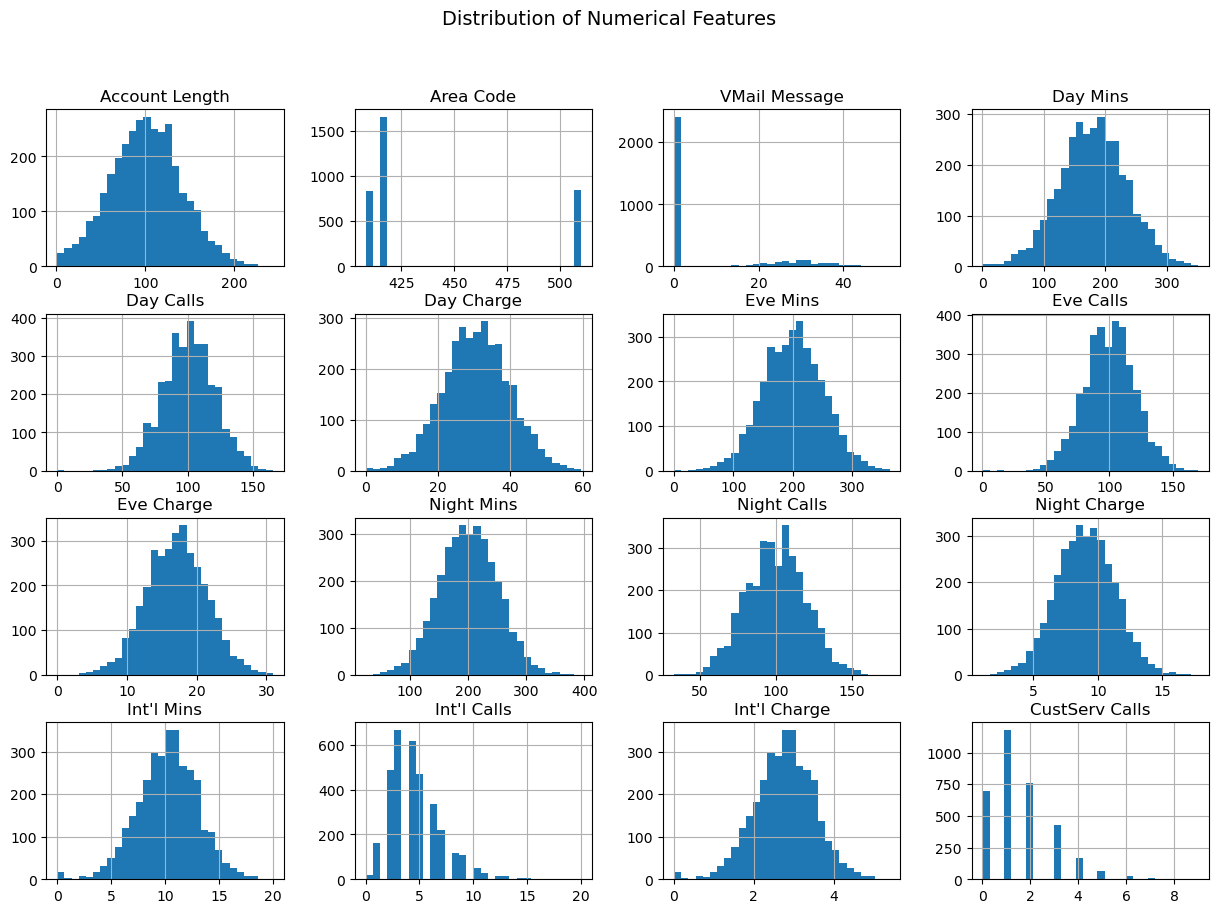

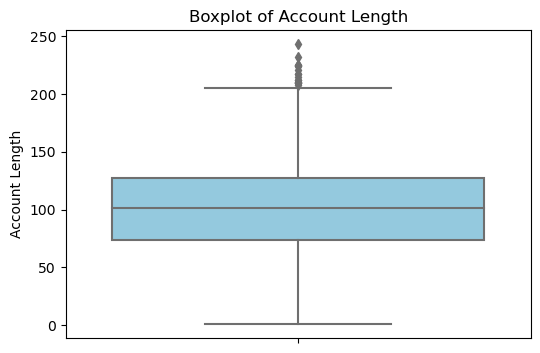

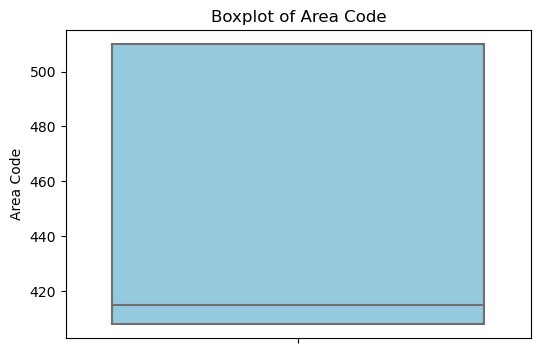

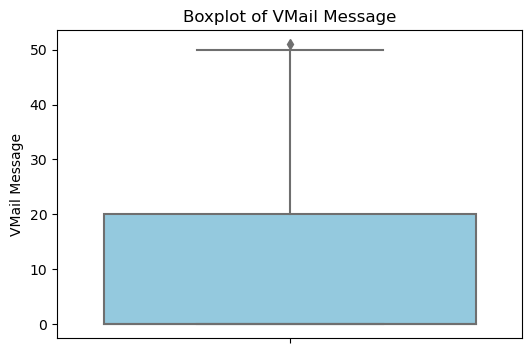

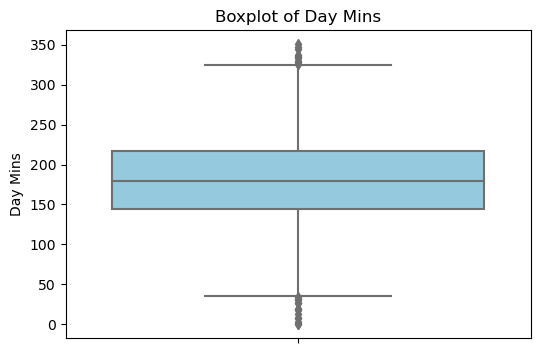

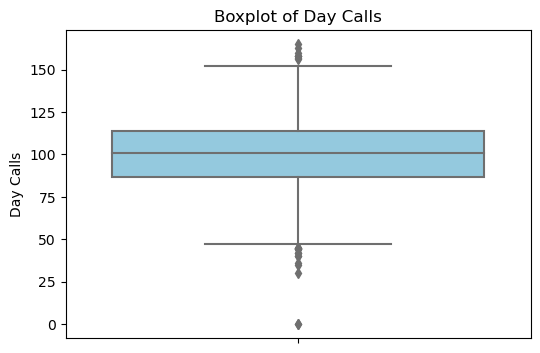

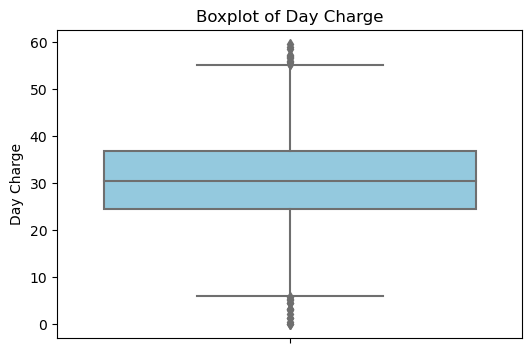

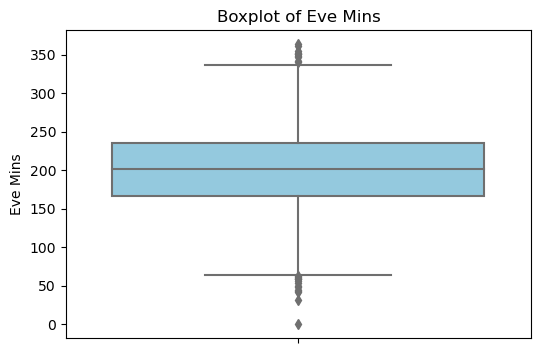

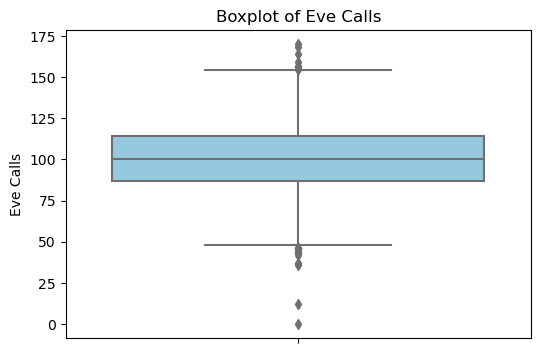

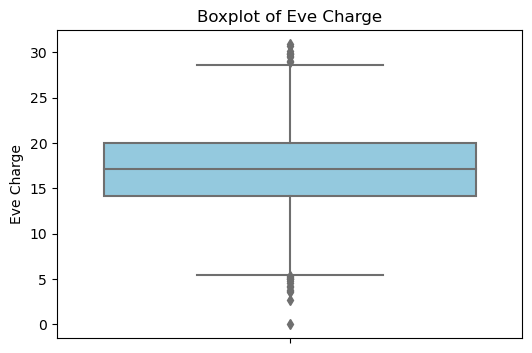

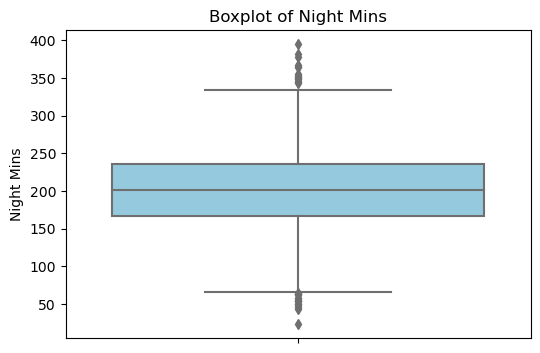

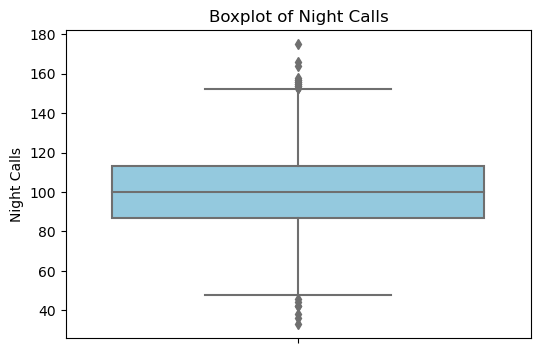

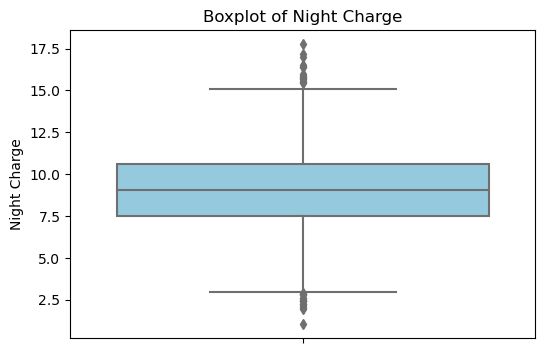

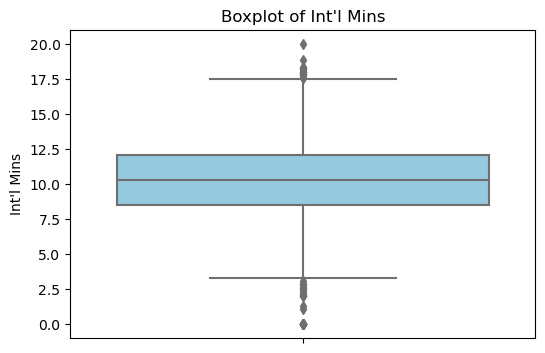

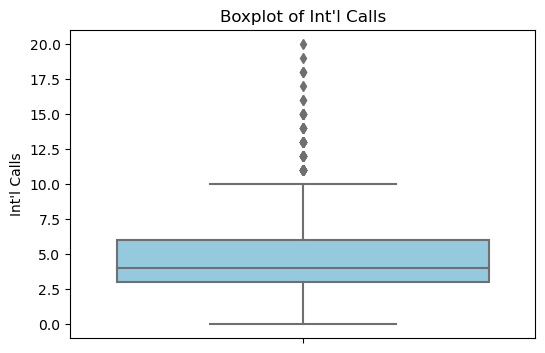

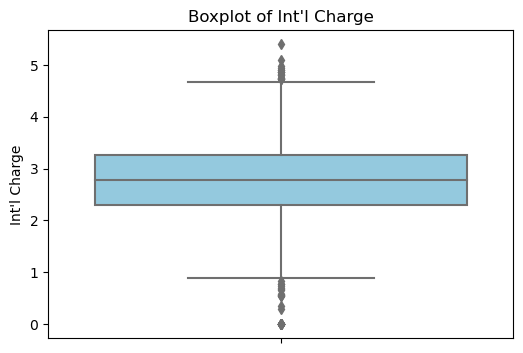

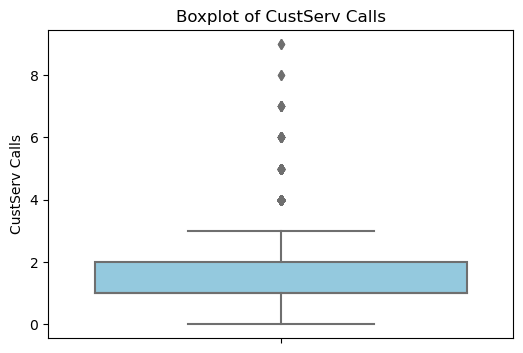

In [74]:
# Descriptive statistics
print(df[num_cols].describe())                 # For Numerical Columns       #(Distribution + Outliers)
# Histograms for numeric columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# Boxplots to check for outliers
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()


In [75]:
# Handling outliers for all numerical columns at once using the IQR method (Interquartile Range)
# Assuming you already have these lists
# numerical_cols = [...]  # list of numerical columns excluding 'Churn'
# categorical_cols = [...]  # list of categorical columns

# Handle outliers using IQR capping
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers handled by capping for all numerical columns.")



Outliers handled by capping for all numerical columns.


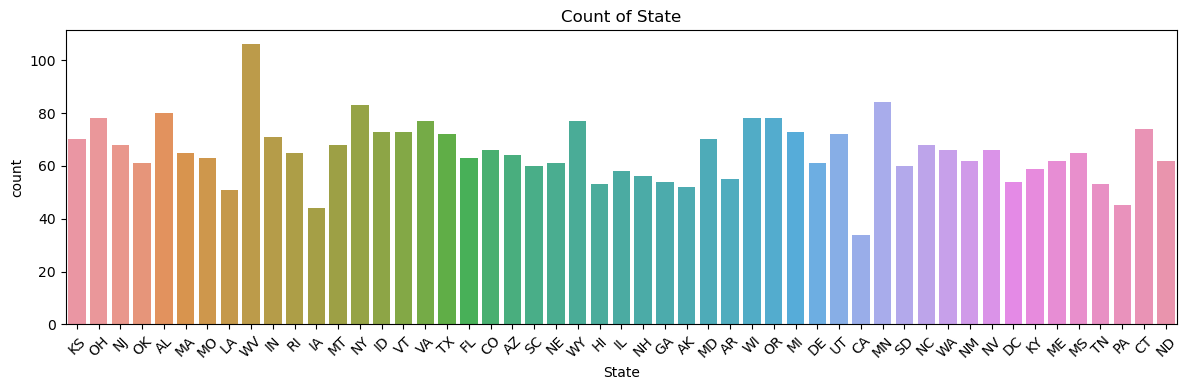

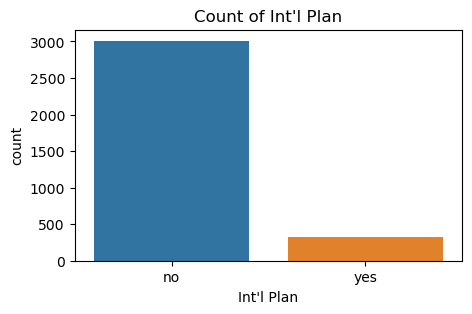

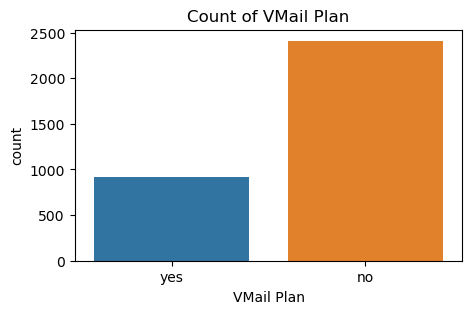

In [76]:
plt.figure(figsize=(12,4))  # wider figure for better visibility
sns.countplot(x='State', data=df)
plt.title(f"Count of State")  # column name as string
plt.xticks(rotation=45)       # rotate x-axis labels
plt.tight_layout()            # adjusts layout so labels don't get cut
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x="Int'l Plan", data=df)
plt.title(f"Count of Int'l Plan")  # column name as string
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x='VMail Plan', data=df)
plt.title(f"Count of VMail Plan")  # column name as string
plt.show()



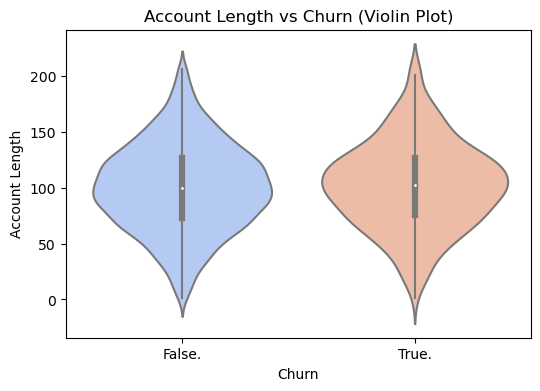

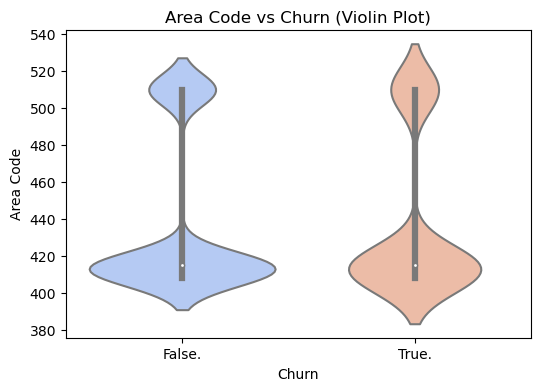

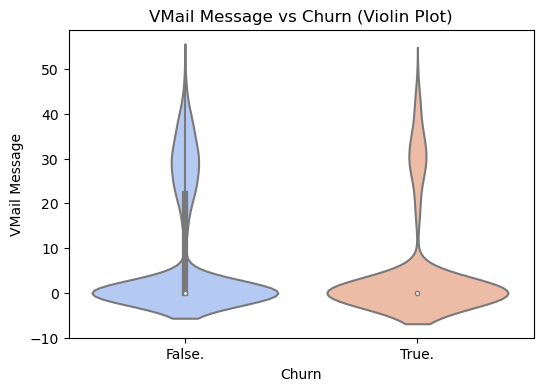

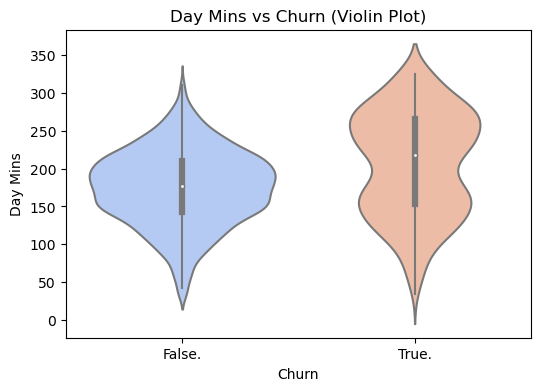

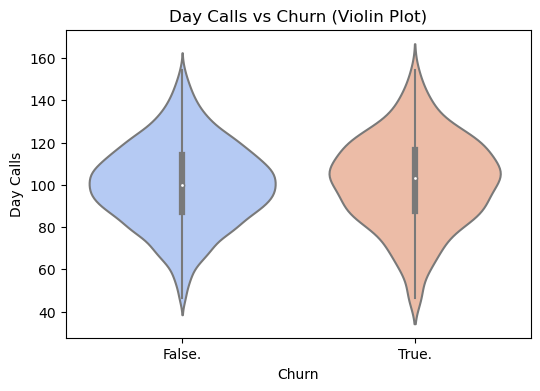

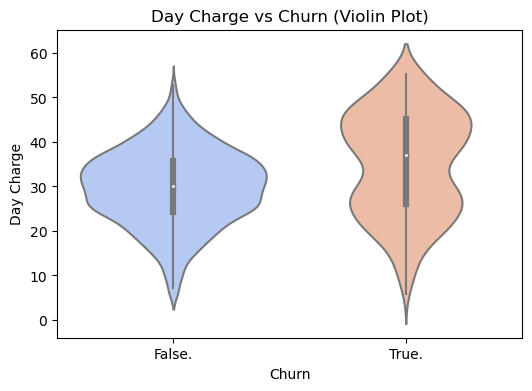

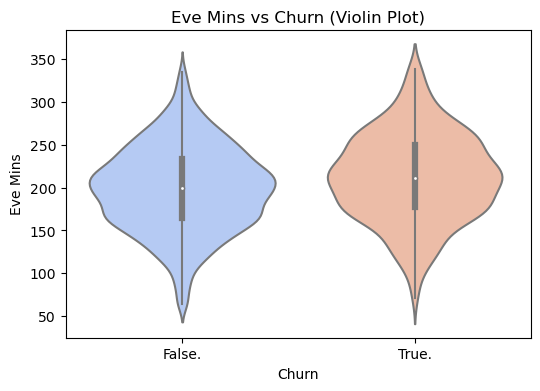

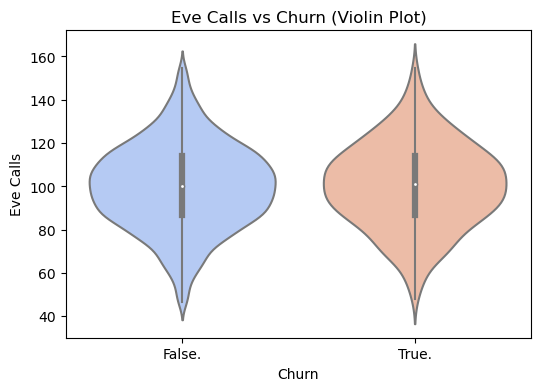

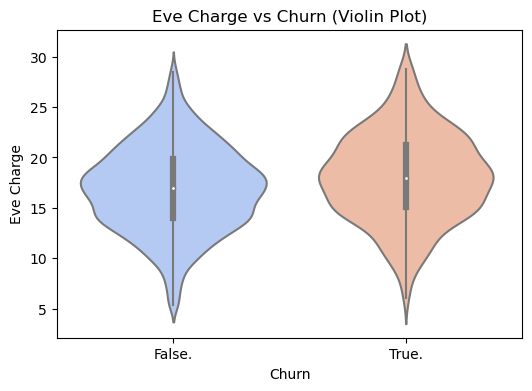

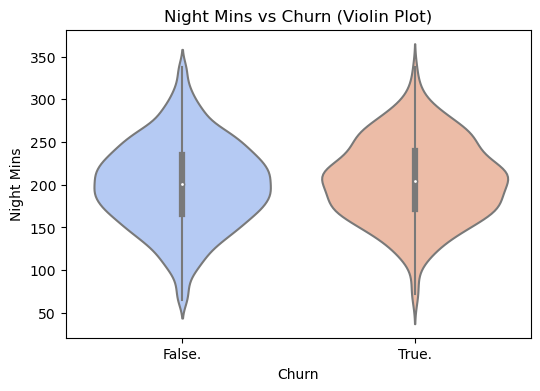

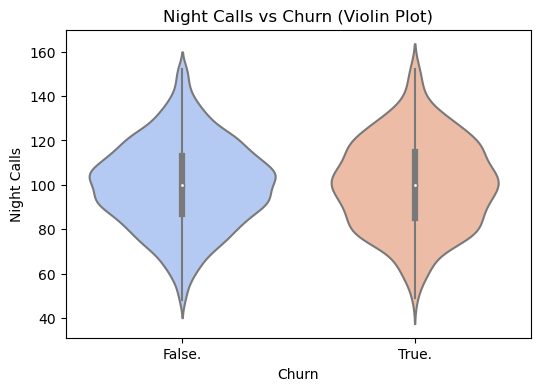

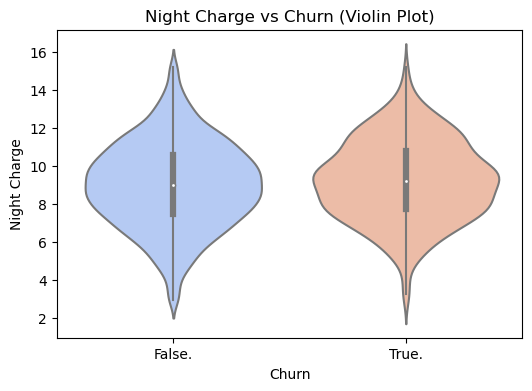

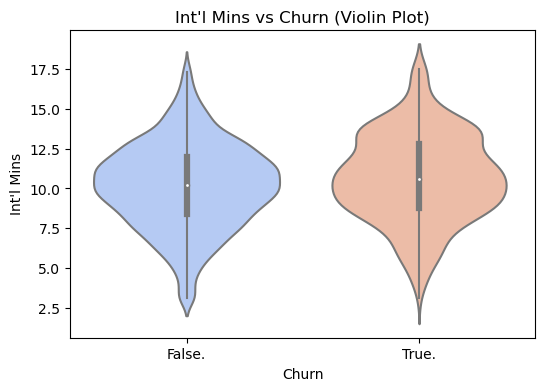

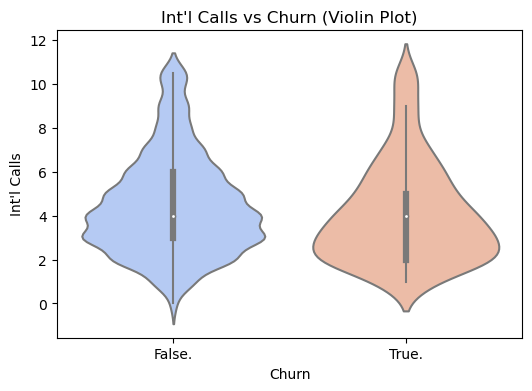

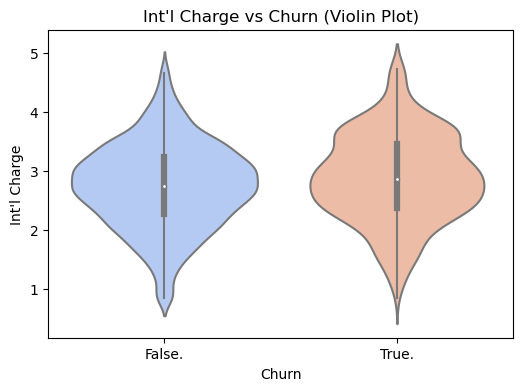

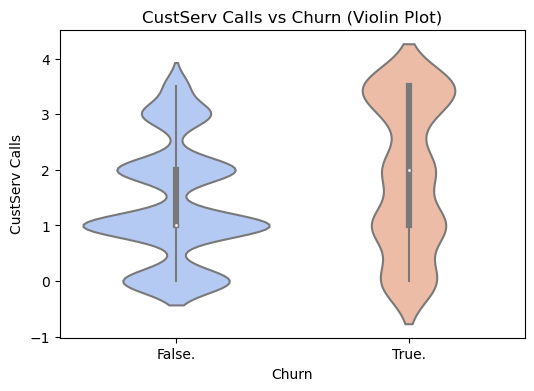

In [77]:
#Bivariate Analysis (feature vs target)
#For Numerical vs Target

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Churn', y=col, data=df, palette='coolwarm')
    plt.title(f"{col} vs Churn (Violin Plot)")
    plt.show()


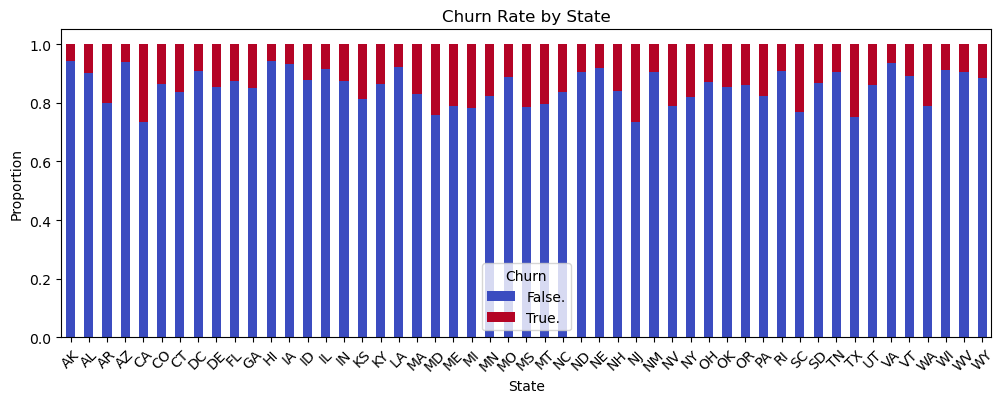

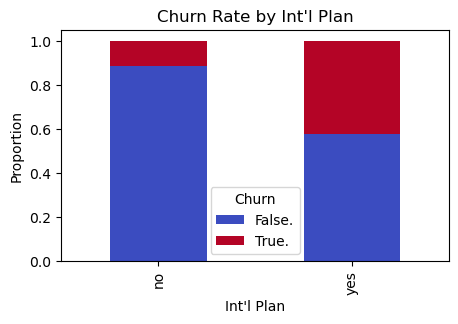

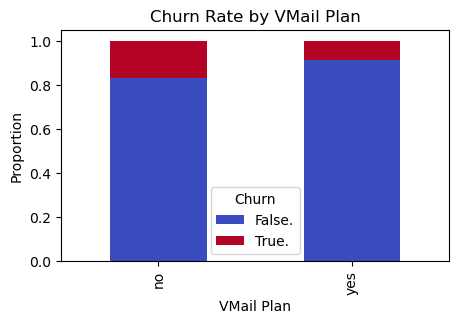

In [78]:
#For Categorical vs Target
#(Churn rates by category — very insightful!)
#For Categorical vs Target
#(Churn rates by category — very insightful!)

      
import pandas as pd
import matplotlib.pyplot as plt

# First plot for 'State'
crosstab = pd.crosstab(df['State'], df['Churn'], normalize='index')
crosstab.plot(kind='bar', stacked=True, figsize=(12,4), colormap='coolwarm')
plt.title("Churn Rate by State")
plt.xticks(rotation=45) 
plt.ylabel("Proportion")
plt.show()

# Now for all other categorical columns
for col in cat_cols:
    if col not in ['Churn', 'State', 'Phone']:
        crosstab = pd.crosstab(df[col], df['Churn'], normalize='index')
        crosstab.plot(kind='bar', stacked=True, figsize=(5,3), colormap='coolwarm')
        plt.title(f"Churn Rate by {col}")
        plt.ylabel("Proportion")
        plt.show()


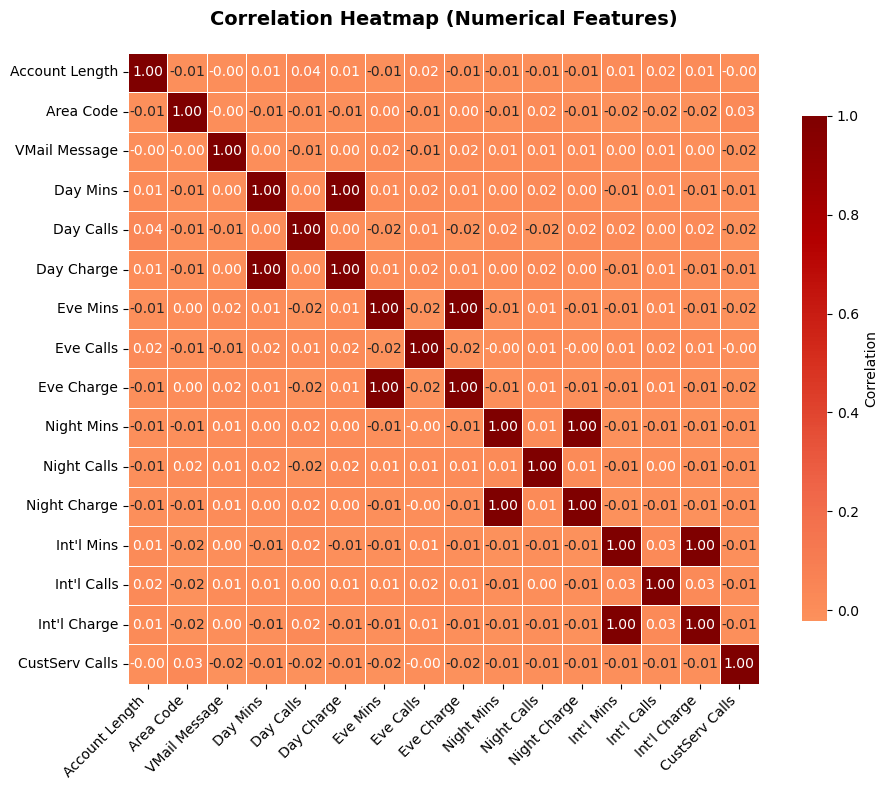

In [79]:
plt.figure(figsize=(10, 8))

# Compute correlation matrix
corr = df[num_cols].corr()

# Beautiful heatmap
sns.heatmap(
    corr,
    annot=True,             # show correlation values
    fmt=".2f",              # limit decimals
    cmap="OrRd",        # color map
    center=0,               # center the colorbar at 0
    linewidths=0.5,         # thin grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation"},  # colorbar size and label
    square=True             # square cells
)

plt.title("Correlation Heatmap (Numerical Features)", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [80]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Int'l Mins,Int'l Calls,Int'l Charge,CustServ Calls,Churn
0,KS,128.0,415,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.
1,OH,107.0,415,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.
2,NJ,137.0,415,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.
3,OH,84.0,408,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.40,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.
4,OK,75.0,415,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.


In [81]:
# We are removing the 'Charge' columns because they are linearly dependent on the corresponding 'Minutes' columns.
# Keeping both would introduce multicollinearity for models like Logistic Regression, SVM, and KNN.
# Tree-based models (Random Forest, Gradient Boosting) can handle correlated features, but removing them simplifies the dataset.
# We are removing State and Phone because they are identifiers with no predictive value for churn.
# List of charge columns to remove
charge_cols = ['Day Charge', 'Eve Charge', 'Night Charge', "Int'l Charge" , 'State', 'Phone']

# Create a new dataframe for model training without charge columns
df_model = df.drop(columns=charge_cols)

# Check the new dataframe
df_model.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn
0,128.0,415,no,yes,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1.0,False.
1,107.0,415,no,yes,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1.0,False.
2,137.0,415,no,no,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0.0,False.
3,84.0,408,yes,no,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2.0,False.
4,75.0,415,yes,no,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3.0,False.


In [82]:
# Make a deep copy of df_model
df_copy = df_model.copy(deep=True)


In [83]:
df_copy.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn
0,128.0,415,no,yes,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1.0,False.
1,107.0,415,no,yes,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1.0,False.
2,137.0,415,no,no,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0.0,False.
3,84.0,408,yes,no,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2.0,False.
4,75.0,415,yes,no,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3.0,False.


In [84]:
df_model.select_dtypes(include=['object', 'category']).columns.tolist()

["Int'l Plan", 'VMail Plan', 'Churn']

In [85]:
df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Account Length',
 'Area Code',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Eve Mins',
 'Eve Calls',
 'Night Mins',
 'Night Calls',
 "Int'l Mins",
 "Int'l Calls",
 'CustServ Calls']

In [86]:
df_model['CustServ Calls'].value_counts()

1.0    1181
2.0     759
0.0     697
3.0     429
3.5     267
Name: CustServ Calls, dtype: int64

In [87]:
df_model['CustServ Calls'] = df_model['CustServ Calls'].round().astype(int) # CustServ Calls can't be in decimal or point value.
df_model.head()


,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn
0,128.0,415,no,yes,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1,False.
1,107.0,415,no,yes,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1,False.
2,137.0,415,no,no,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0,False.
3,84.0,408,yes,no,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2,False.
4,75.0,415,yes,no,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3,False.


In [88]:
df_model['CustServ Calls'].value_counts()

1    1181
2     759
0     697
3     429
4     267
Name: CustServ Calls, dtype: int64

In [89]:
# --- Feature Engineering ---

# Avoid division by zero when computing averages
df_model['Day_Avg_Call_Duration'] = df_model['Day Mins'] / df_model['Day Calls'].replace(0, 1)
df_model['Eve_Avg_Call_Duration'] = df_model['Eve Mins'] / df_model['Eve Calls'].replace(0, 1)
df_model['Night_Avg_Call_Duration'] = df_model['Night Mins'] / df_model['Night Calls'].replace(0, 1)
df_model['Intl_Avg_Call_Duration'] = df_model["Int'l Mins"] / df_model["Int'l Calls"].replace(0, 1)

# Binary flag for high customer service calls (customer frustration indicator)
df_model['High_CustServ_Calls'] = (df_model['CustServ Calls'] > 2).astype(int)

# View the new columns
df_model.head()


,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Night_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,128.0,415,no,yes,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1,False.,2.410000,1.993939,2.689011,3.333333,0
1,107.0,415,no,yes,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1,False.,1.313821,1.898058,2.469903,4.566667,0
2,137.0,415,no,no,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0,False.,2.135088,1.101818,1.563462,2.440000,0
3,84.0,408,yes,no,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2,False.,4.216901,0.722159,2.212360,0.942857,0
4,75.0,415,yes,no,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3,False.,1.475221,1.215574,1.544628,3.366667,1


In [91]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Label Encoding for binary categorical variables
binary_cols = ["Int'l Plan", 'VMail Plan']
le = LabelEncoder()
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])
    
    
# 2. Encode target column 'Churn'

target_encoder = LabelEncoder()
df_model['Churn'] = target_encoder.fit_transform(df_model['Churn'])

df_model.head()


,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Night_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,128.0,415,0,1,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1,0,2.410000,1.993939,2.689011,3.333333,0
1,107.0,415,0,1,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1,0,1.313821,1.898058,2.469903,4.566667,0
2,137.0,415,0,0,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0,0,2.135088,1.101818,1.563462,2.440000,0
3,84.0,408,1,0,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2,0,4.216901,0.722159,2.212360,0.942857,0
4,75.0,415,1,0,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3,0,1.475221,1.215574,1.544628,3.366667,1


In [92]:
df_model.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Night_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,128.0,415,0,1,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1,0,2.410000,1.993939,2.689011,3.333333,0
1,107.0,415,0,1,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1,0,1.313821,1.898058,2.469903,4.566667,0
2,137.0,415,0,0,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0,0,2.135088,1.101818,1.563462,2.440000,0
3,84.0,408,1,0,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2,0,4.216901,0.722159,2.212360,0.942857,0
4,75.0,415,1,0,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3,0,1.475221,1.215574,1.544628,3.366667,1


In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_model.drop('Churn', axis=1)   # Features (all columns except target)
y = df_model['Churn']                # Target column

selector = SelectKBest(score_func=f_classif, k='all')  # Initialize selector
selector.fit(X, y)                                    # Compute scores for each feature

feature_scores = pd.DataFrame({
    'Feature': X.columns,          # Feature names
    'Score': selector.scores_      # F-scores computed
}).sort_values(by='Score', ascending=False)  # Sort features by importance

print(feature_scores)

                    Feature       Score
2                Int'l Plan  241.206004
5                  Day Mins  145.810306
13           CustServ Calls  108.960762
18      High_CustServ_Calls   99.301631
14    Day_Avg_Call_Duration   81.083146
3                VMail Plan   35.122944
7                  Eve Mins   28.501952
4             VMail Message   27.034131
17   Intl_Avg_Call_Duration   23.247552
11               Int'l Mins   14.820214
12              Int'l Calls   11.848277
15    Eve_Avg_Call_Duration   10.064734
9                Night Mins    4.364962
16  Night_Avg_Call_Duration    2.101366
6                 Day Calls    1.308519
0            Account Length    0.882581
8                 Eve Calls    0.219673
1                 Area Code    0.126986
10              Night Calls    0.124543


In [94]:
df_model.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Night_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,128.0,415,0,1,25.0,265.1,110.0,197.40,99.0,244.7,91.0,10.0,3.0,1,0,2.410000,1.993939,2.689011,3.333333,0
1,107.0,415,0,1,26.0,161.6,123.0,195.50,103.0,254.4,103.0,13.7,3.0,1,0,1.313821,1.898058,2.469903,4.566667,0
2,137.0,415,0,0,0.0,243.4,114.0,121.20,110.0,162.6,104.0,12.2,5.0,0,0,2.135088,1.101818,1.563462,2.440000,0
3,84.0,408,1,0,0.0,299.4,71.0,63.55,88.0,196.9,89.0,6.6,7.0,2,0,4.216901,0.722159,2.212360,0.942857,0
4,75.0,415,1,0,0.0,166.7,113.0,148.30,122.0,186.9,121.0,10.1,3.0,3,0,1.475221,1.215574,1.544628,3.366667,1


In [95]:
feature_scores

,Feature,Score
2,Int'l Plan,241.206004
5,Day Mins,145.810306
13,CustServ Calls,108.960762
18,High_CustServ_Calls,99.301631
14,Day_Avg_Call_Duration,81.083146
3,VMail Plan,35.122944
7,Eve Mins,28.501952
4,VMail Message,27.034131
17,Intl_Avg_Call_Duration,23.247552
11,Int'l Mins,14.820214


In [97]:
import os

# Folder path
save_path = r"D:\Customer Churn Analysis and Prediction\Dataset"
os.makedirs(save_path, exist_ok=True)

# Save the processed datasets
df_model.to_csv(os.path.join(save_path, "df_model.csv"), index=False)
feature_scores.to_csv(os.path.join(save_path, "feature_scores.csv"), index=False)


print("✅ All datasets saved successfully inside the 'Dataset' folder!")


✅ All datasets saved successfully inside the 'Dataset' folder!


In [102]:
# Assuming feature_scores DataFrame has 'Feature' and 'Score' columns
low_score_features = feature_scores[feature_scores['Score'] < 10]['Feature'].tolist()

# Drop these features from df_model
df_model = df_model.drop(columns=low_score_features)

# Optional: print the dropped features
print("Dropped features due to low score (<10):", low_score_features)

Dropped features due to low score (<10): ['Night Mins', 'Night_Avg_Call_Duration', 'Day Calls', 'Account Length', 'Eve Calls', 'Area Code', 'Night Calls']


In [103]:
df_model.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Eve Mins,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,0,1,25.0,265.1,197.40,10.0,3.0,1,0,2.410000,1.993939,3.333333,0
1,0,1,26.0,161.6,195.50,13.7,3.0,1,0,1.313821,1.898058,4.566667,0
2,0,0,0.0,243.4,121.20,12.2,5.0,0,0,2.135088,1.101818,2.440000,0
3,1,0,0.0,299.4,63.55,6.6,7.0,2,0,4.216901,0.722159,0.942857,0
4,1,0,0.0,166.7,148.30,10.1,3.0,3,0,1.475221,1.215574,3.366667,1


In [104]:
from sklearn.preprocessing import StandardScaler

# Updated numerical columns to scale
nume_cols = ['VMail Message', 'Day Mins', 'Eve Mins', "Int'l Mins", 
            "Int'l Calls", 'CustServ Calls', 'Day_Avg_Call_Duration', 'Eve_Avg_Call_Duration',
            'Intl_Avg_Call_Duration']

scaler = StandardScaler()
df_model[nume_cols] = scaler.fit_transform(df_model[nume_cols])

# Check the first few rows
df_model.head()


,Int'l Plan,VMail Plan,VMail Message,Day Mins,Eve Mins,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,0,1,1.234989,1.575128,-0.071627,-0.093573,-0.627131,-0.435457,0,0.752678,-0.143500,0.096732,0
1,0,1,1.308059,-0.336439,-0.109330,1.266421,-0.627131,-0.435457,0,-0.773935,-0.274276,0.645542,0
2,0,0,-0.591778,1.174346,-1.583717,0.715072,0.253150,-1.278792,0,0.369817,-1.360296,-0.300784,0
3,1,0,-0.591778,2.208623,-2.727707,-1.343298,1.133431,0.407877,0,3.269090,-1.878126,-0.966983,0
4,1,0,-0.591778,-0.242246,-1.045953,-0.056817,-0.627131,1.251212,0,-0.549158,-1.205140,0.111565,1


In [105]:
df_model['Churn'].value_counts(normalize=True) * 100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

In [106]:
df_model.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Eve Mins,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,0,1,1.234989,1.575128,-0.071627,-0.093573,-0.627131,-0.435457,0,0.752678,-0.143500,0.096732,0
1,0,1,1.308059,-0.336439,-0.109330,1.266421,-0.627131,-0.435457,0,-0.773935,-0.274276,0.645542,0
2,0,0,-0.591778,1.174346,-1.583717,0.715072,0.253150,-1.278792,0,0.369817,-1.360296,-0.300784,0
3,1,0,-0.591778,2.208623,-2.727707,-1.343298,1.133431,0.407877,0,3.269090,-1.878126,-0.966983,0
4,1,0,-0.591778,-0.242246,-1.045953,-0.056817,-0.627131,1.251212,0,-0.549158,-1.205140,0.111565,1


In [107]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import pandas as pd

# ======================
# 1. Train-test split
# ======================
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ======================
# 2. Handle Imbalanced Data with SMOTE
# ======================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Percent distribution after SMOTE
percent_dist = y_train_res.value_counts(normalize=True) * 100
print("Percent distribution after SMOTE:\n", percent_dist)

# ======================
# 3. Helper function for evaluation
# ======================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return accuracy, precision, recall, f1

# ======================
# 4. Define models & GridSearch parameters
# ======================
models_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {'C':[0.01, 0.1, 1, 10, 100], 'penalty':['l2'], 'solver':['lbfgs'], 'class_weight':['balanced']}
    },
    "Random Forest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {'n_estimators':[50,100,200], 'max_depth':[10,20,None], 'min_samples_split':[2,5,10]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {'n_estimators':[50,100,200], 'learning_rate':[0.01,0.1,0.2], 'max_depth':[3,5,7]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {'n_neighbors':list(range(3,16)), 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
    },
    "SVM": {
        "model": SVC(class_weight='balanced', probability=True, random_state=42),
        "params": {'C':[0.1,1,10,50], 'kernel':['linear','rbf','poly'], 'gamma':['scale','auto']}
    }
}

# ======================
# 5. Train models using GridSearchCV and evaluate
# ======================
results = []

for name, mp in models_params.items():
    print(f"\nTraining {name} with GridSearchCV...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    best_model = grid.best_estimator_
    print("Best parameters:", grid.best_params_)
    
    acc, prec, rec, f1 = evaluate_model(best_model, X_test, y_test)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc,4),
        "Precision": round(prec,4),
        "Recall": round(rec,4),
        "F1-Score": round(f1,4)
    })

# ======================
# 6. Summary of results
# ======================
results_df = pd.DataFrame(results)
print("\nSummary of Model Comparison:")
print(results_df)


C:\Users\sahoo\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Percent distribution after SMOTE:
 0    50.0
1    50.0
Name: Churn, dtype: float64

Training Logistic Regression with GridSearchCV...
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7166
Precision: 0.2982
Recall: 0.7010
F1-Score: 0.4185

Training Random Forest with GridSearchCV...
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9070
Precision: 0.6636
Recall: 0.7320
F1-Score: 0.6961

Training Gradient Boosting with GridSearchCV...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9190
Precision: 0.7087
Recall: 0.7526
F1-Score: 0.7300

Training KNN with GridSearchCV...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Accuracy: 0.8291
Precision: 0.4331
Recall: 0.5670
F1-Score: 0.4911

Training SVM with GridSearchCV...
Best parameters: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8591
Precision: 0.5143
Recall: 

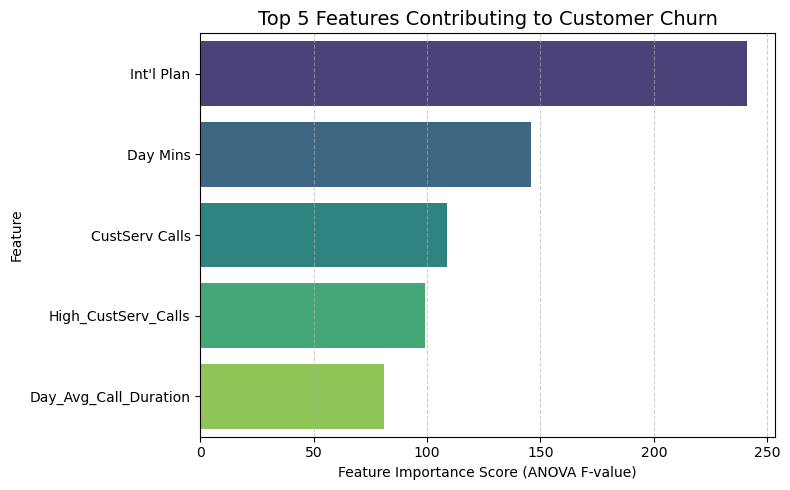

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the feature_scores DataFrame from SelectKBest
# If not, you can re-run that part quickly

top_features = feature_scores.head(5)  # Top 5 features

plt.figure(figsize=(8,5))
sns.barplot(data=top_features, x='Score', y='Feature', palette='viridis')
plt.title('Top 5 Features Contributing to Customer Churn', fontsize=14)
plt.xlabel('Feature Importance Score (ANOVA F-value)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


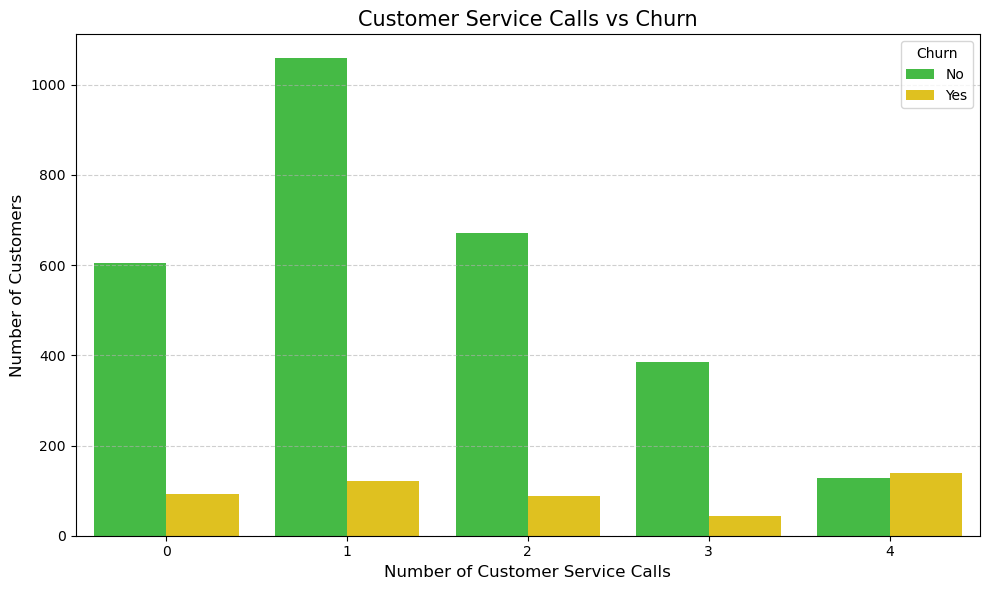

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


df['CustServ Calls'] = df['CustServ Calls'].round().astype(int)# CustServ Calls can't be in decimal or point value for the plot.

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CustServ Calls', hue='Churn', palette=['#32CD32', '#FFD700'])

plt.title("Customer Service Calls vs Churn", fontsize=15)
plt.xlabel("Number of Customer Service Calls", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [47]:
df_model.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Eve Mins,Int'l Mins,Int'l Calls,CustServ Calls,Churn,Day_Avg_Call_Duration,Eve_Avg_Call_Duration,Intl_Avg_Call_Duration,High_CustServ_Calls
0,0,1,1.234989,1.575128,-0.071627,-0.093573,-0.627131,-0.435457,0,0.752678,-0.143500,0.096732,0
1,0,1,1.308059,-0.336439,-0.109330,1.266421,-0.627131,-0.435457,0,-0.773935,-0.274276,0.645542,0
2,0,0,-0.591778,1.174346,-1.583717,0.715072,0.253150,-1.278792,0,0.369817,-1.360296,-0.300784,0
3,1,0,-0.591778,2.208623,-2.727707,-1.343298,1.133431,0.407877,0,3.269090,-1.878126,-0.966983,0
4,1,0,-0.591778,-0.242246,-1.045953,-0.056817,-0.627131,1.251212,0,-0.549158,-1.205140,0.111565,1


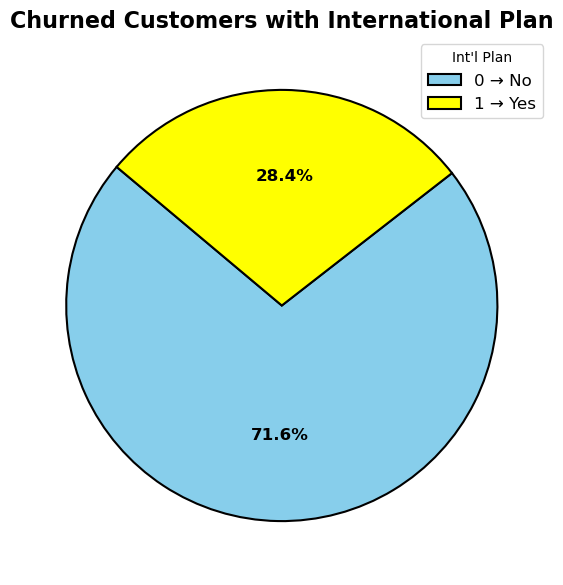

In [53]:
import matplotlib.pyplot as plt

# Enable inline plots
%matplotlib inline

# Filter churned customers
churned = df_model[df_model['Churn'] == 1]
intl_churn_counts = churned["Int'l Plan"].value_counts()

# Pie chart colors
colors = ['skyblue', 'yellow']

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    intl_churn_counts,
    labels=None,  # remove labels from slices
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # joined slices
)

# Improve text size
for text in autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Add legend to show what 0 and 1 mean
plt.legend(
    wedges, 
    [f"0 → No", "1 → Yes"], 
    title="Int'l Plan", 
    loc="best", 
    fontsize=12
)

plt.title("Churned Customers with International Plan", fontsize=16, fontweight='bold')
plt.show()
